Dataset preview:
    MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  Coas

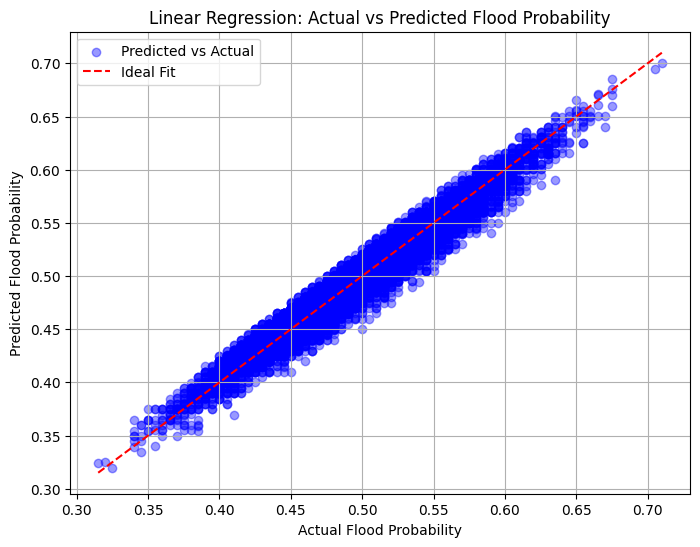

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


file_path = "flood.csv"
df = pd.read_csv(file_path)
print("Dataset preview:\n", df.head())


print("\nMissing values before handling:\n", df.isnull().sum())


df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

columns_to_drop = ['RiverManagement']
df.drop(columns=columns_to_drop, inplace=True)


df.fillna(df.mean(numeric_only=True), inplace=True)


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nModel Performance:\nRMSE: {rmse:.4f}\nR² Score: {r2:.4f}\nMAE: {mae:.4f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.4, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Linear Regression: Actual vs Predicted Flood Probability")
plt.legend()
plt.grid(True)
plt.show()
